<h2 style="text-align: center">House Prices</h2>
<p style="text-align: center">Rahul Halder, 510519089</p>
<p style="text-align: center">August 12, 2022</p>

### Import Packages

In [341]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing

from matplotlib import pyplot



### Load and analyse dataset

In [342]:
train_df = pd.read_csv('train.csv')
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [343]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [344]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Drop columns with mostly missing values

In [345]:
train_df = train_df.drop(labels=['Alley','FireplaceQu','PoolQC','Fence', 'MiscFeature'], axis=1)
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


### Drop rows with missing values

In [346]:
train_df = train_df.dropna()
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [347]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1094 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1094 non-null   int64  
 1   MSSubClass     1094 non-null   int64  
 2   MSZoning       1094 non-null   object 
 3   LotFrontage    1094 non-null   float64
 4   LotArea        1094 non-null   int64  
 5   Street         1094 non-null   object 
 6   LotShape       1094 non-null   object 
 7   LandContour    1094 non-null   object 
 8   Utilities      1094 non-null   object 
 9   LotConfig      1094 non-null   object 
 10  LandSlope      1094 non-null   object 
 11  Neighborhood   1094 non-null   object 
 12  Condition1     1094 non-null   object 
 13  Condition2     1094 non-null   object 
 14  BldgType       1094 non-null   object 
 15  HouseStyle     1094 non-null   object 
 16  OverallQual    1094 non-null   int64  
 17  OverallCond    1094 non-null   int64  
 18  YearBuil

### Split into train and test

In [348]:
train_data, test_data = train_test_split(train_df, test_size = 0.2, random_state = 10)

### Linear Regression Model

In [349]:
train_data[['LotArea', 'SalePrice']]

,LotArea,SalePrice
1238,13072,142500
323,5820,126175
742,8450,179000
1012,10592,165000
365,10690,147000
...,...,...
648,7700,155000
339,12400,155000
1382,7200,157000
971,2268,173000


In [350]:
X = np.array(train_data['LotArea'])
X = X.reshape(-1, 1)
y = train_data['SalePrice']

reg = LinearRegression()
reg.fit(X, y)


print("Intercept: ", reg.intercept_)
print("Slope: ", reg.coef_)

Intercept:  156648.97533379996
Slope:  [2.8805447]


### Multiple Regression Model

- Model 1

In [351]:
scaler = StandardScaler()

coefs = []

X_train = train_data[['LotFrontage', 'LotArea']]
X_test = test_data[['LotFrontage', 'LotArea']]
y_train = train_data['SalePrice']
y_test = test_data['SalePrice']


reg.fit(X_train, y_train)

p = reg.predict(X_test)

model_slope = reg.coef_
model_intercept = reg.intercept_

coefs.append(model_slope[1])

print("Model 1 Slope: ", model_slope)
print("Model 1 Intercept: ", model_intercept)

Model 1 Slope:  [880.24697549   1.79200964]
Model 1 Intercept:  105394.30730105563


In [352]:
def calculateR2AndMSE(X_train, y_train, X_test, y_test, predict, model):
    r2 = r2_score(y_test, predict)
    mse = mean_squared_error(y_test, predict)

    print("Model ", model, " Test r2 score: ", r2)
    print("Model ", model," Test MSE: ", mse)

    predict = reg.predict(X_train)

    r2 = r2_score(y_train, predict)
    mse = mean_squared_error(y_train, predict)

    print("Model ", model, " Train r2 score: ", r2)
    print("Model ", model," Train MSE: ", mse)


calculateR2AndMSE(X_train, y_train, X_test, y_test, p, 1)

Model  1  Test r2 score:  0.16283844252530355
Model  1  Test MSE:  5785417314.45331
Model  1  Train r2 score:  0.14312626702765963
Model  1  Train MSE:  5912193987.931643


- Model 2

In [353]:
X_train = train_data[['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond']]
X_test = test_data[['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond']]
y_train = train_data['SalePrice']
y_test = test_data['SalePrice']


reg.fit(X_train, y_train)

p = reg.predict(X_test)

model_slope = reg.coef_
model_intercept = reg.intercept_

coefs.append(model_slope[1])

print("Model 2 Slope: ", model_slope)
print("Model 2 Intercept: ", model_intercept)

Model 2 Slope:  [3.59781204e+02 1.27355043e+00 4.55732926e+04 1.01546742e+03]
Model 2 Intercept:  -141620.0897286197


In [354]:
calculateR2AndMSE(X_train, y_train, X_test, y_test, p, 2)

Model  2  Test r2 score:  0.6666681928956059
Model  2  Test MSE:  2303574012.7592535
Model  2  Train r2 score:  0.6717621548224285
Model  2  Train MSE:  2264751199.8516564


- Model 3

In [355]:
X_train = train_data[['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', 'GrLivArea']]
X_test = test_data[['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', 'GrLivArea']]
y_train = train_data['SalePrice']
y_test = test_data['SalePrice']

reg.fit(X_train, y_train)

p = reg.predict(X_test)

model_slope = reg.coef_
model_intercept = reg.intercept_

coefs.append(model_slope[1])

print("Model 3 Slope: ", model_slope)
print("Model 3 Intercept: ", model_intercept)

Model 3 Slope:  [-2.02786026e+01  7.75338907e-01  3.21243212e+04  1.67321399e+03
  3.29004040e+01  4.70135451e+01]
Model 3 Intercept:  -139749.9569841435


In [356]:
calculateR2AndMSE(X_train, y_train, X_test, y_test, p, 3)

Model  3  Test r2 score:  0.6917842872422371
Model  3  Test MSE:  2130002871.3146281
Model  3  Train r2 score:  0.7471073255094802
Model  3  Train MSE:  1744890165.4721026


- Model 4

In [357]:
train_data[["LotArea", "Street", "OverallCond", '1stFlrSF', "Neighborhood", "SalePrice"]]

,LotArea,Street,OverallCond,1stFlrSF,Neighborhood,SalePrice
1238,13072,Pave,5,1141,SawyerW,142500
323,5820,Pave,8,1163,OldTown,126175
742,8450,Pave,5,1349,SawyerW,179000
1012,10592,Pave,7,900,Crawfor,165000
365,10690,Pave,7,672,IDOTRR,147000
...,...,...,...,...,...,...
648,7700,Pave,5,1051,NAmes,155000
339,12400,Pave,7,1215,NAmes,155000
1382,7200,Pave,7,998,OldTown,157000
971,2268,Pave,5,764,NridgHt,173000


In [358]:
train_data['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

In [359]:
train_data['Neighborhood'].unique()

array(['SawyerW', 'OldTown', 'Crawfor', 'IDOTRR', 'NridgHt', 'Mitchel',
       'NWAmes', 'Somerst', 'Gilbert', 'NAmes', 'BrDale', 'Sawyer',
       'NoRidge', 'Timber', 'Blmngtn', 'BrkSide', 'Edwards', 'CollgCr',
       'StoneBr', 'SWISU', 'NPkVill', 'MeadowV', 'ClearCr', 'Veenker',
       'Blueste'], dtype=object)

In [360]:
le = preprocessing.LabelEncoder()
le.fit_transform(train_data['Street'])
train_data.loc[:, 'Street'] = le.transform(train_data['Street'])
le.fit_transform(test_data['Street'])
test_data.loc[:, 'Street'] = le.transform(test_data['Street'])
le.fit_transform(train_data['Neighborhood'])
train_data.loc[:, 'Neighborhood'] = le.transform(train_data['Neighborhood'])
le.fit_transform(test_data['Neighborhood'])
test_data.loc[:, 'Neighborhood'] = le.transform(test_data['Neighborhood'])

In [361]:
train_data[["LotArea", "Street", "OverallCond", '1stFlrSF', "Neighborhood", "SalePrice"]]

,LotArea,Street,OverallCond,1stFlrSF,Neighborhood,SalePrice
1238,13072,1,5,1141,20,142500
323,5820,1,8,1163,17,126175
742,8450,1,5,1349,20,179000
1012,10592,1,7,900,6,165000
365,10690,1,7,672,9,147000
...,...,...,...,...,...,...
648,7700,1,5,1051,12,155000
339,12400,1,7,1215,12,155000
1382,7200,1,7,998,17,157000
971,2268,1,5,764,16,173000


In [362]:
X_train = train_data[['LotArea','Street']]
X_test = test_data[['LotArea', 'Street']]
y_train = train_data['SalePrice']
y_test = test_data['SalePrice']

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

reg.fit(X_train, y_train)

p = reg.predict(X_test)

model_slope = reg.coef_
model_intercept = reg.intercept_

coefs.append(model_slope[0])

print("Model 4 Slope: ", model_slope)
print("Model 4 Intercept: ", model_intercept)

Model 4 Slope:  [24625.73340285  6341.47089136]
Model 4 Intercept:  185599.20342857143


In [363]:
calculateR2AndMSE(X_train, y_train, X_test, y_test, p, 4)

Model  4  Test r2 score:  0.11204321703358477
Model  4  Test MSE:  6136450605.969725
Model  4  Train r2 score:  0.09319719243495661
Model  4  Train MSE:  6256690922.860442


- Model 5

In [364]:
X_train = train_data[['LotArea','OverallCond', 'Street', 'Neighborhood']]
X_test = test_data[['LotArea','OverallCond', 'Street', 'Neighborhood']]
y_train = train_data['SalePrice']
y_test = test_data['SalePrice']

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

reg.fit(X_train, y_train)

p = reg.predict(X_test)

model_slope = reg.coef_
model_intercept = reg.intercept_

coefs.append(model_slope[0])

print("Model 5 Slope: ", model_slope)
print("Model 5 Intercept: ", model_intercept)

Model 5 Slope:  [22761.10101646 -9295.51077383  6194.2337339  17168.84458601]
Model 5 Intercept:  185599.20342857143


In [365]:
calculateR2AndMSE(X_train, y_train, X_test, y_test, p, 5)

Model  5  Test r2 score:  0.18409632711288737
Model  5  Test MSE:  5638509310.300987
Model  5  Train r2 score:  0.15179105066321863
Model  5  Train MSE:  5852409354.857199


- Model 6

In [366]:
X_train = train_data[["LotArea", "Street", "OverallCond", '1stFlrSF', "Neighborhood", "YearBuilt"]]
X_test = test_data[["LotArea", "Street", "OverallCond", '1stFlrSF', "Neighborhood", "YearBuilt"]]
y_train = train_data['SalePrice']
y_test = test_data['SalePrice']

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

reg.fit(X_train, y_train)

p = reg.predict(X_test)

model_slope = reg.coef_
model_intercept = reg.intercept_

coefs.append(model_slope[0])

print("Model 6 Slope: ", model_slope)
print("Model 6 Intercept: ", model_intercept)

Model 6 Slope:  [11524.6047108   2508.39929505 10462.02761495 36197.31339523
  9237.39275774 35952.62722826]
Model 6 Intercept:  185599.20342857132


In [367]:
calculateR2AndMSE(X_train, y_train, X_test, y_test, p, 6)

Model  6  Test r2 score:  0.5538935304675412
Model  6  Test MSE:  3082931926.196019
Model  6  Train r2 score:  0.545678872858351
Model  6  Train MSE:  3134691300.6188383


In [368]:
print(coefs)

[1.7920096350953578, 1.2735504307668348, 0.7753389073540511, 24625.73340284705, 22761.10101646309, 11524.604710802918]


### Graph plot for feature LotArea

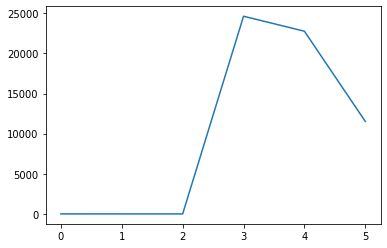

In [369]:
X = [_ for _ in range(6)]
fig = pyplot.plot(X, coefs)
pyplot.show()

### Polynomial Regression with Degree 2

In [370]:
X_train = train_data[['LotArea']]
X_test = test_data[['LotArea']]
y_train = train_data[['SalePrice']]
y_test = test_data[['SalePrice']]

polynomialFeatures = PolynomialFeatures(degree = 2, include_bias = False)

X_train = polynomialFeatures.fit_transform(X_train)
X_train = scaler.fit_transform(X_train)
X_test = polynomialFeatures.fit_transform(X_test)
X_test = scaler.fit_transform(X_test)

reg.fit(X_train, y_train)

p = reg.predict(X_test)

model_slope = reg.coef_
model_intercept = reg.intercept_

print("Polynomial Regression (Degree 2) Slope: ", model_slope)
print("Polynomial Regression (Degree 2) Intercept: ", model_intercept)

calculateR2AndMSE(X_train, y_train, X_test, y_test, p, 'Polynomial Regression (Degree 2)')

Polynomial Regression (Degree 2) Slope:  [[ 71129.91524465 -53016.36837802]]
Polynomial Regression (Degree 2) Intercept:  [185599.20342857]
Model  Polynomial Regression (Degree 2)  Test r2 score:  0.16845718463964865
Model  Polynomial Regression (Degree 2)  Test MSE:  5746587571.707075
Model  Polynomial Regression (Degree 2)  Train r2 score:  0.18031262314924257
Model  Polynomial Regression (Degree 2)  Train MSE:  5655618319.15431


### Polynomial Regression with Degree 3

In [372]:
X_train = train_data[['LotArea']]
X_test = test_data[['LotArea']]
y_train = train_data[['SalePrice']]
y_test = test_data[['SalePrice']]

polynomialFeatures = PolynomialFeatures(degree = 3, include_bias = False)

X_train = polynomialFeatures.fit_transform(X_train)
X_train = scaler.fit_transform(X_train)
X_test = polynomialFeatures.fit_transform(X_test)
X_test = scaler.fit_transform(X_test)

reg.fit(X_train, y_train)

p = reg.predict(X_test)

model_slope = reg.coef_
model_intercept = reg.intercept_

print("Polynomial Regression (Degree 3) Slope: ", model_slope)
print("Polynomial Regression (Degree 3) Intercept: ", model_intercept)

calculateR2AndMSE(X_train, y_train, X_test, y_test, p, 'Polynomial Regression (Degree 3)')

Polynomial Regression (Degree 3) Slope:  [[ 111985.56088879 -296875.5760479   209194.10969061]]
Polynomial Regression (Degree 3) Intercept:  [185599.20342857]
Model  Polynomial Regression (Degree 3)  Test r2 score:  0.03158094168142522
Model  Polynomial Regression (Degree 3)  Test MSE:  6692505571.497407
Model  Polynomial Regression (Degree 3)  Train r2 score:  0.1993945326864135
Model  Polynomial Regression (Degree 3)  Train MSE:  5523958371.483165
